In [1]:

import pickle
import random

In [2]:
length_file_path = '/mnt/usb2/data/negsample/bgc_len.txt'
possentence_file_path = '/mnt/usb2/data/corpus/corpus_mibig.txt'
possentences_path = '/mnt/usb2/data/negsample/possentences.pkl'
word_frequency_dic_path = '/mnt/usb2/data/negsample/word_frequency_dic_min3.pkl'
mibig_word_frequency_dic_path = '/mnt/usb2/data/negsample/mibig_word_frequency_dic.pkl'
with open(length_file_path, 'r')as fl, open(possentences_path, 'rb')as fp, open(word_frequency_dic_path, 'rb')as fw:
    length_data = fl.read().split()[1::2]
    length_data_num = len(length_data)
    length_data = list(map(int, length_data))
    #取出mibig中的bgc序列
    lines = pickle.load(fp)
    sentences = [line.strip('\n') for line in lines]
    possentences = []
    possentences_word = []
    mibig_word_frequency_dic = {}
    #去掉长度为1的序列
    for sentence in sentences:
        sentence_word = sentence.split(' ')
        for word in sentence_word:
            mibig_word_frequency_dic[word] = mibig_word_frequency_dic.get(word, 0) + 1
        if len(sentence_word)<=1:
            continue
        else:
            possentences.append(sentence)
            possentences_word = possentences_word + sentence_word
    
    print(f'mibig词总数：{len(mibig_word_frequency_dic)}')
    print('去重前mibig中基因数量：', len(possentences_word))
    poseword = list(set(possentences_word))# 长度>1的bgc中的所有基因（id）
    poseword_num = len(poseword)
    print('去重后mibig中基因数量：', poseword_num)
    #取出genome中的所有min_count=3的基因（id）
    word_frequency_dic = pickle.load(fw)
    genome_word_list = list(word_frequency_dic.keys())
mibig_word_counts = []

for word in poseword:
    if word in word_frequency_dic:
        mibig_word_counts.append(word_frequency_dic[word])
        word_frequency_dic[word] = mibig_word_frequency_dic[word]#防止会把min_count<3的重新添加进word_frequency_dic
print(f"min_count=3的总字典中mibig基因的数量：{len(mibig_word_counts)}")
print(f"min_count=3的总字典中基因的数量：{len(word_frequency_dic)}")
mibig_word_total_counts = sum(mibig_word_counts)
word_total_counts = sum(list(word_frequency_dic.values()))
print(f'字典中mibig基因总counts：{mibig_word_total_counts}')
print(f'字典中总counts：{word_total_counts}')

mibig词总数：11564
去重前mibig中基因数量： 40929
去重后mibig中基因数量： 11557
min_count=3的总字典中mibig基因的数量：9989
min_count=3的总字典中基因的数量：640854
字典中mibig基因总counts：44957380
字典中总counts：72669343


mibig词总数：11564
去重前mibig中基因数量： 40929
去重后mibig中基因数量： 11557
negsentences_length:
[41  6  9 ... 31 24  3]
min_count=3的总字典中mibig基因的数量：9989
min_count=3的总字典中基因的数量：640854
word_frequency_dic 中没有 Cluster_0019091
word_frequency_dic 中没有 Cluster_1104858
word_frequency_dic 中没有 EC:2.3.1.232
word_frequency_dic 中没有 Cluster_1900636
word_frequency_dic 中没有 Cluster_1870614
word_frequency_dic 中没有 Cluster_0306749
word_frequency_dic 中没有 Cluster_1639354
word_frequency_dic 中没有 Cluster_1422395
word_frequency_dic 中没有 Cluster_0377039
word_frequency_dic 中没有 Cluster_0204004
word_frequency_dic 中没有 Cluster_0848602
word_frequency_dic 中没有 Cluster_0172535
word_frequency_dic 中没有 Cluster_0775127
word_frequency_dic 中没有 Cluster_0800869
word_frequency_dic 中没有 Cluster_0848618
word_frequency_dic 中没有 Cluster_1514712
word_frequency_dic 中没有 Cluster_0975911
word_frequency_dic 中没有 Cluster_1354172
word_frequency_dic 中没有 Cluster_0165686
word_frequency_dic 中没有 Cluster_1107123
word_frequency_dic 中没有 Cluster_0775150
word_frequency_dic 中没

['Cluster_0644774 Cluster_0088896 Cluster_1408221 EC:4.2.1.136 Cluster_1037897 Cluster_1426648 Cluster_1073587 Cluster_1903968 Cluster_0349545 Cluster_1221122 Cluster_0779982 Cluster_0274795 Cluster_1715314 Cluster_1436010 Cluster_0200548 Cluster_0373354 Cluster_1425603 Cluster_0334735 Cluster_0643420 Cluster_1088909 Cluster_1465054 EC:6.2.1.3 Cluster_0194583 Cluster_1058052 Cluster_1099395 Cluster_0677391 Cluster_0115926 Cluster_0202748 Cluster_1117767 Cluster_1233730 Cluster_1579119 EC:2.7.7.9 Cluster_0411744 Cluster_0975689 EC:2.1.1.234 Cluster_1579085 Cluster_0841004 Cluster_0557844 Cluster_0966835 Cluster_0871106 Cluster_0439552',
 'Cluster_0060283 Cluster_1008972 Cluster_1774948 Cluster_1234450 EC:2.7.13.3 Cluster_1849501',
 'Cluster_0321044 Cluster_1912052 Cluster_0548427 Cluster_0618865 EC:4.1.2.13 Cluster_1560526 EC:5.1.3.2 Cluster_1830047 Cluster_1157846',
 'EC:1.2.7.3 Cluster_0825866 EC:2.2.1.2 Cluster_0373019 Cluster_0200163 Cluster_1044407 Cluster_0630324 Cluster_1830047 C

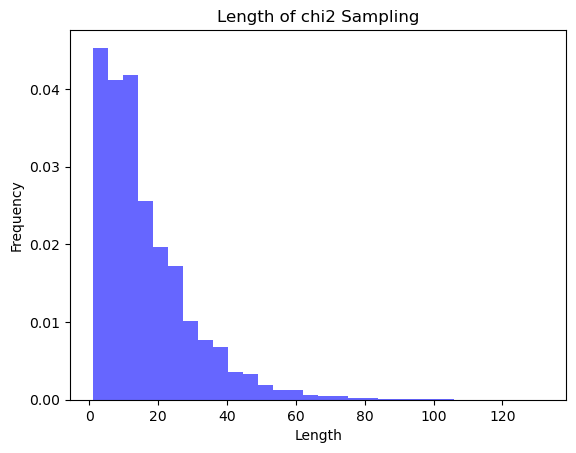

In [3]:
#50%采集负样本
class sentence_sampling:
    def __init__(self, word_list, weights, sentences_length):
        self.word_list = word_list
        self.sentences_length = sentences_length
        self.weights = weights

    def generate_sentence(self, plot=False):
        sentences = []
        for sentence_length in self.sentences_length:
            sentence = ' '.join(random.choices(population=self.word_list, weights=self.weights, k=sentence_length))
            #print(sentence)
            sentences.append(sentence)
        if plot:
            # 绘制直方图
            plt.hist(sentences_length, bins=30, density=True, alpha=0.6, color='b')
            plt.title("Length of chi2 Sampling")
            plt.xlabel('Length')
            plt.ylabel('Frequency')
            plt.savefig('/home/yaoshuai/tools/lstm_bgc/data/neg_testing_data.png')
        return sentences

    def add_label(self, label: str, sentences: list):
        sentences_list = []
        for sentence in sentences:
            sentences_list.append(label+sentence)
        return sentences_list

length_file_path = '/home/yaoshuai/data/negsample/bgc_len.txt'
possentence_file_path = '/home/yaoshuai/data/corpus/corpus_mibig.txt'
negtest_path = '/home/yaoshuai/tools/lstm_bgc/data/neg_testing_data.txt'
possentences_path = '/home/yaoshuai/data/negsample/possentences.pkl'
possentences_path2 = '/home/yaoshuai/data/negsample/possentences2.pkl'
negsentences_path = '/home/yaoshuai/data/negsample/negsentences2.pkl'
word_frequency_dic_path = '/home/yaoshuai/data/negsample/word_frequency_dic_min3.pkl'
mibig_word_frequency_dic_path = '/home/yaoshuai/data/negsample/mibig_word_frequency_dic.pkl'
with open(length_file_path, 'r')as fl, open(possentences_path, 'rb')as fp, open(word_frequency_dic_path, 'rb')as fw:
    length_data = fl.read().split()[1::2]
    length_data_num = len(length_data)
    length_data = list(map(int, length_data))
    #取出mibig中的bgc序列
    lines = pickle.load(fp)
    sentences = [line.strip('\n') for line in lines]
    possentences = []
    possentences_word = []
    mibig_word_frequency_dic = {}
    #去掉长度为1的序列
    for sentence in sentences:
        sentence_word = sentence.split(' ')
        for word in sentence_word:
            mibig_word_frequency_dic[word] = mibig_word_frequency_dic.get(word, 0) + 1
        if len(sentence_word)<=1:
            continue
        else:
            possentences.append(sentence)
            possentences_word = possentences_word + sentence_word
    
    print(f'mibig词总数：{len(mibig_word_frequency_dic)}')
    print('去重前mibig中基因数量：', len(possentences_word))
    poseword = list(set(possentences_word))# 长度>1的bgc中的所有基因（id）
    poseword_num = len(poseword)
    print('去重后mibig中基因数量：', poseword_num)
    #取出genome中的所有min_count=3的基因（id）
    word_frequency_dic = pickle.load(fw)
    genome_word_list = list(word_frequency_dic.keys())

df = 2.7008291842129593  # 自由度参数
loc = 0.7619598528358154  # 位置参数
scale = 5.7855219372765525  # 缩放参数
#按照卡方分布采样
sentences_length = np.round(chi2.rvs(df, loc=loc, scale=scale, size=length_data_num*10)).astype(int)
print(f'negsentences_length:\n{sentences_length}')
#创建权重数组
mibig_word_counts = []

for word in poseword:
    if word in word_frequency_dic:
        mibig_word_counts.append(mibig_word_frequency_dic[word])
        word_frequency_dic[word] = mibig_word_frequency_dic[word]#防止会把min_count<3的重新添加进word_frequency_dic
print(f"min_count=3的总字典中mibig基因的数量：{len(mibig_word_counts)}")
print(f"min_count=3的总字典中基因的数量：{len(word_frequency_dic)}")
mibig_word_total_counts = sum(mibig_word_counts)
word_total_counts = sum(list(word_frequency_dic.values()))
for word in poseword:
    try:
        word_frequency_dic[word] = word_frequency_dic[word]*((word_total_counts - mibig_word_total_counts)/mibig_word_total_counts)
    except:
        print(f'word_frequency_dic 中没有 {word}')
        continue
print(f'字典中mibig基因总counts：{mibig_word_total_counts}')
print(f'字典中总counts：{word_total_counts}')
weights = list(word_frequency_dic.values())
#采样
negsampling = sentence_sampling(genome_word_list, weights, sentences_length)
negsentences = negsampling.generate_sentence(plot=True)
negsentences

In [6]:
print(len(negsentences))
with open(negtest_path, 'w')as f:
    f.write('id,text\n')
    count = 0
    for sentnece in negsentences:
        f.write(f'{count},{sentnece}\n')
        count += 1

25020


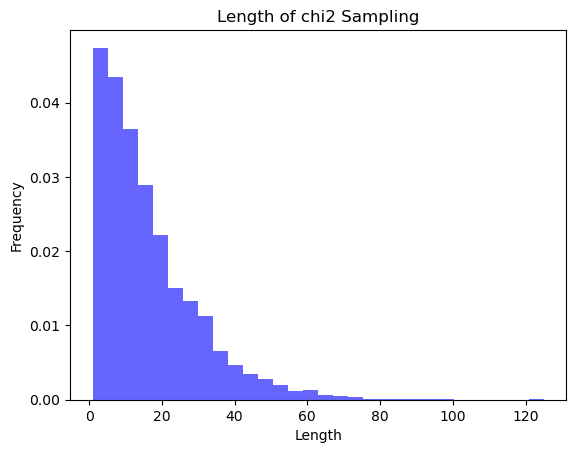

In [4]:
#从genome（38%mibig）采集负样本，生成训练集
class sentence_sampling:
    def __init__(self, word_list, weights, sentences_length):
        self.word_list = word_list
        self.sentences_length = sentences_length
        self.weights = weights

    def generate_sentence(self, plot=False):
        sentences = []
        for sentence_length in self.sentences_length:
            sentence = ' '.join(random.choices(population=self.word_list, weights=self.weights, k=sentence_length))
            #print(sentence)
            sentences.append(sentence)
        if plot:
            # 绘制直方图
            plt.hist(sentences_length, bins=30, density=True, alpha=0.6, color='b')
            plt.title("Length of chi2 Sampling")
            plt.xlabel('Length')
            plt.ylabel('Frequency')
            plt.savefig('/home/yaoshuai/tools/lstm_bgc/data/training_label_genome.png')
        return sentences

    def add_label(self, label: str, sentences: list):
        sentences_list = []
        for sentence in sentences:
            sentences_list.append(label+sentence)
        return sentences_list

length_file_path = '/home/yaoshuai/data/negsample/bgc_len.txt'
possentence_file_path = '/home/yaoshuai/data/corpus/corpus_mibig.txt'
training_path = '/home/yaoshuai/tools/lstm_bgc/data/training_label_genome.txt'
possentences_path = '/home/yaoshuai/data/negsample/possentences.pkl'
possentences_path2 = '/home/yaoshuai/data/negsample/possentences2.pkl'
negsentences_path = '/home/yaoshuai/data/negsample/negsentences2.pkl'
word_frequency_dic_path = '/home/yaoshuai/data/negsample/word_frequency_dic_min3.pkl'
mibig_word_frequency_dic_path = '/home/yaoshuai/data/negsample/mibig_word_frequency_dic.pkl'
with open(length_file_path, 'r')as fl, open(possentences_path, 'rb')as fp, open(word_frequency_dic_path, 'rb')as fw:
    length_data = fl.read().split()[1::2]
    length_data = list(map(int, length_data))
    #取出mibig中的bgc序列
    lines = pickle.load(fp)
    sentences = [line.strip('\n') for line in lines]
    possentences = []
    possentences_word = []
    #去掉长度为1的序列
    for sentence in sentences:
        sentence_word = sentence.split(' ')
        if len(sentence_word)<=1:
            continue
        else:
            possentences.append(sentence)
            possentences_word = possentences_word + sentence_word
    length_data_num = len(possentences)
    word_frequency_dic = pickle.load(fw)
    genome_word_list = list(word_frequency_dic.keys())

df = 2.7008291842129593  # 自由度参数
loc = 0.7619598528358154  # 位置参数
scale = 5.7855219372765525  # 缩放参数
#按照卡方分布采样
sentences_length = np.round(chi2.rvs(df, loc=loc, scale=scale, size=length_data_num*3)).astype(int)
weights = list(word_frequency_dic.values())
#采样
negsampling = sentence_sampling(genome_word_list, weights, sentences_length)
negsentences = negsampling.generate_sentence(plot=True)
#sentences前加label
poslabel = '1 +++$+++ '
neglabel = '0 +++$+++ '
possentences = negsampling.add_label(poslabel, possentences)
negsentences = negsampling.add_label(neglabel, negsentences)
tatal_list = possentences + negsentences
#打乱顺序
random.shuffle(tatal_list)
#保存
with open(training_path, 'w')as f:
    for i in tatal_list:
        f.write(i+'\n')

In [2]:
#shuffle
def sentence_shuffle(sentence):
    random.shuffle(sentence)
    new_sentence = ' '.join(sentence)
    return new_sentence

training_path = '/home/yaoshuai/tools/lstm_bgc/data/posshuffle_len5_testing_data.txt'
possentences_path = '/home/yaoshuai/data/negsample/possentences.pkl'
with open(possentences_path, 'rb')as fp:
    #取出mibig中的bgc序列
    lines = pickle.load(fp)
    sentences = [line.strip('\n') for line in lines]
    possentences = []
    #去掉长度为1的序列
    for sentence in sentences:
        sentence_word = sentence.split(' ')
        if len(sentence_word)<=5:
            continue
        else:
            possentences.append(sentence_word)

#打乱顺序
possentences = list(map(sentence_shuffle, possentences))
print(possentences)
#保存
with open(training_path, 'w')as f:
    f.write('id,text\n')
    count = 0
    for sentnece in possentences:
        f.write(f'{count},{sentnece}\n')
        count += 1

['Cluster_0251447 EC:2.7.7.24 EC:2.7.7.27 Cluster_0204845 Cluster_1449151 EC:2.7.1.187 EC:2.6.1.62 Cluster_1125125 Cluster_0648696 EC:5.1.3.35 Cluster_0201874 Cluster_0339541 Cluster_0732693 Cluster_0952189 Cluster_0282493 Cluster_1816866 EC:4.2.3.4 EC:4.2.1.46 EC:2.7.1.188 Cluster_0927147 Cluster_0767559 Cluster_0724785 Cluster_0767559 Cluster_1816866 Cluster_1750286 Cluster_1154972 Cluster_0819229 Cluster_1036579', 'EC:6.2.1.3 Cluster_1153963 Cluster_1124421 Cluster_1607345 Cluster_1534836 Cluster_1501678 Cluster_0034481', 'EC:2.3.1.94 EC:2.3.1.74 Cluster_0105435 EC:4.2.1.136 EC:2.3.1.94 EC:2.3.1.233', 'EC:2.7.7.58 Cluster_0257197 Cluster_0410901 Cluster_0864917 Cluster_1814246 Cluster_0787769 Cluster_1567364 Cluster_1616514 Cluster_0864917 Cluster_0440532', 'Cluster_0860590 Cluster_1205960 EC:3.6.3.41 Cluster_1657081 Cluster_1847313 Cluster_1205963 Cluster_1073373 Cluster_0913370 Cluster_0627192 Cluster_1205962 Cluster_1021965 Cluster_0937957 Cluster_0481389 Cluster_1073374 Cluster_

In [8]:
#shuffle
def sentence_shuffle(sentence):
    random.shuffle(sentence)
    new_sentence = ' '.join(sentence)
    return new_sentence

training_path = '/home/yaoshuai/tools/lstm_bgc/data/poslenLE2_testing_data.txt'
possentences_path = '/home/yaoshuai/data/negsample/possentences.pkl'
with open(possentences_path, 'rb')as fp:
    #取出mibig中的bgc序列
    lines = pickle.load(fp)
    sentences = [line.strip('\n') for line in lines]
    possentences = []
    #去掉长度为1的序列
    for sentence in sentences:
        sentence_word = sentence.split(' ')
        if len(sentence_word)>2:
            continue
        else:
            possentences.append(sentence)

#保存
with open(training_path, 'w')as f:
    f.write('id,text\n')
    count = 0
    for sentnece in possentences:
        f.write(f'{count},{sentnece}\n')
        count += 1

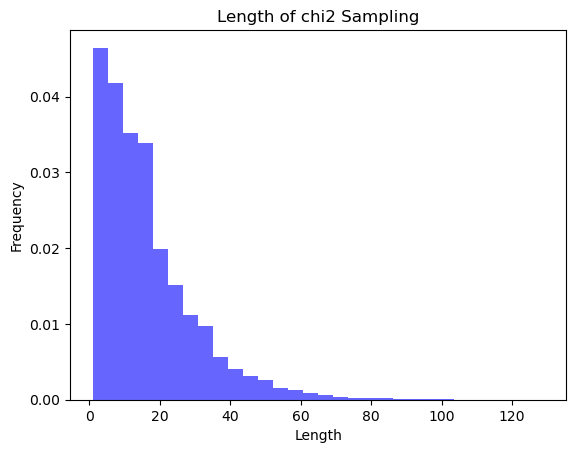

In [12]:
#从genome（38%mibig）采集负样本，生成测试集
class sentence_sampling:
    def __init__(self, word_list, weights, sentences_length):
        self.word_list = word_list
        self.sentences_length = sentences_length
        self.weights = weights

    def generate_sentence(self, plot=False):
        sentences = []
        for sentence_length in self.sentences_length:
            sentence = ' '.join(random.choices(population=self.word_list, weights=self.weights, k=sentence_length))
            #print(sentence)
            sentences.append(sentence)
        if plot:
            # 绘制直方图
            plt.hist(sentences_length, bins=30, density=True, alpha=0.6, color='b')
            plt.title("Length of chi2 Sampling")
            plt.xlabel('Length')
            plt.ylabel('Frequency')
            plt.savefig('/home/yaoshuai/tools/lstm_bgc/data/neg_genome_testing_data.png')
        return sentences

    def add_label(self, label: str, sentences: list):
        sentences_list = []
        for sentence in sentences:
            sentences_list.append(label+sentence)
        return sentences_list

length_file_path = '/home/yaoshuai/data/negsample/bgc_len.txt'
possentence_file_path = '/home/yaoshuai/data/corpus/corpus_mibig.txt'
training_path = '/home/yaoshuai/tools/lstm_bgc/data/neg_genome_testing_data.txt'
possentences_path = '/home/yaoshuai/data/negsample/possentences.pkl'
possentences_path2 = '/home/yaoshuai/data/negsample/possentences2.pkl'
negsentences_path = '/home/yaoshuai/data/negsample/negsentences2.pkl'
word_frequency_dic_path = '/home/yaoshuai/data/negsample/word_frequency_dic_min3.pkl'
mibig_word_frequency_dic_path = '/home/yaoshuai/data/negsample/mibig_word_frequency_dic.pkl'
with open(length_file_path, 'r')as fl, open(word_frequency_dic_path, 'rb')as fw:
    length_data = fl.read().split()[1::2]
    length_data_num = len(length_data)
    length_data = list(map(int, length_data))
    #取出genome中的所有min_count=3的基因（id）
    word_frequency_dic = pickle.load(fw)
    genome_word_list = list(word_frequency_dic.keys())

df = 2.7008291842129593  # 自由度参数
loc = 0.7619598528358154  # 位置参数
scale = 5.7855219372765525  # 缩放参数
#按照卡方分布采样
sentences_length = np.round(chi2.rvs(df, loc=loc, scale=scale, size=length_data_num*10)).astype(int)
#创建权重数组
weights = list(word_frequency_dic.values())
#采样
negsampling = sentence_sampling(genome_word_list, weights, sentences_length)
negsentences = negsampling.generate_sentence(plot=True)


In [13]:
#保存
with open(training_path, 'w')as f:
    f.write('id,text\n')
    count = 0
    for sentnece in negsentences:
        f.write(f'{count},{sentnece}\n')
        count += 1

In [ ]:
#生成half测试集
#50%采集负样本
class sentence_sampling:
    def __init__(self, word_list, weights, sentences_length):
        self.word_list = word_list
        self.sentences_length = sentences_length
        self.weights = weights

    def generate_sentence(self, plot=False):
        sentences = []
        for sentence_length in self.sentences_length:
            sentence = ' '.join(random.choices(population=self.word_list, weights=self.weights, k=sentence_length))
            #print(sentence)
            sentences.append(sentence)
        if plot:
            # 绘制直方图
            plt.hist(sentences_length, bins=30, density=True, alpha=0.6, color='b')
            plt.title("Length of chi2 Sampling")
            plt.xlabel('Length')
            plt.ylabel('Frequency')
            plt.savefig('/home/yaoshuai/tools/lstm_bgc/data/neg_testing_data.png')
        return sentences

    def add_label(self, label: str, sentences: list):
        sentences_list = []
        for sentence in sentences:
            sentences_list.append(label+sentence)
        return sentences_list

length_file_path = '/home/yaoshuai/data/negsample/bgc_len.txt'
possentence_file_path = '/home/yaoshuai/data/corpus/corpus_mibig.txt'
negtest_path = '/home/yaoshuai/tools/lstm_bgc/data/neg_testing_data.txt'
possentences_path = '/home/yaoshuai/data/negsample/possentences.pkl'
possentences_path2 = '/home/yaoshuai/data/negsample/possentences2.pkl'
negsentences_path = '/home/yaoshuai/data/negsample/negsentences2.pkl'
word_frequency_dic_path = '/home/yaoshuai/data/negsample/word_frequency_dic_min3.pkl'
mibig_word_frequency_dic_path = '/home/yaoshuai/data/negsample/mibig_word_frequency_dic.pkl'
with open(length_file_path, 'r')as fl, open(possentences_path, 'rb')as fp, open(word_frequency_dic_path, 'rb')as fw:
    length_data = fl.read().split()[1::2]
    length_data_num = len(length_data)
    length_data = list(map(int, length_data))
    #取出mibig中的bgc序列
    lines = pickle.load(fp)
    sentences = [line.strip('\n') for line in lines]
    possentences = []
    possentences_word = []
    mibig_word_frequency_dic = {}
    #去掉长度为1的序列
    for sentence in sentences:
        sentence_word = sentence.split(' ')
        for word in sentence_word:
            mibig_word_frequency_dic[word] = mibig_word_frequency_dic.get(word, 0) + 1
        if len(sentence_word)<=1:
            continue
        else:
            possentences.append(sentence)
            possentences_word = possentences_word + sentence_word
    
    print(f'mibig词总数：{len(mibig_word_frequency_dic)}')
    print('去重前mibig中基因数量：', len(possentences_word))
    poseword = list(set(possentences_word))# 长度>1的bgc中的所有基因（id）
    poseword_num = len(poseword)
    print('去重后mibig中基因数量：', poseword_num)
    #取出genome中的所有min_count=3的基因（id）
    word_frequency_dic = pickle.load(fw)
    genome_word_list = list(word_frequency_dic.keys())

df = 2.7008291842129593  # 自由度参数
loc = 0.7619598528358154  # 位置参数
scale = 5.7855219372765525  # 缩放参数
#按照卡方分布采样
sentences_length = np.round(chi2.rvs(df, loc=loc, scale=scale, size=length_data_num*10)).astype(int)
print(f'negsentences_length:\n{sentences_length}')
#创建权重数组
mibig_word_counts = []

for word in poseword:
    if word in word_frequency_dic:
        mibig_word_counts.append(mibig_word_frequency_dic[word])
        word_frequency_dic[word] = mibig_word_frequency_dic[word]#防止会把min_count<3的重新添加进word_frequency_dic
print(f"min_count=3的总字典中mibig基因的数量：{len(mibig_word_counts)}")
print(f"min_count=3的总字典中基因的数量：{len(word_frequency_dic)}")
mibig_word_total_counts = sum(mibig_word_counts)
word_total_counts = sum(list(word_frequency_dic.values()))
for word in poseword:
    try:
        word_frequency_dic[word] = word_frequency_dic[word]*((word_total_counts - mibig_word_total_counts)/mibig_word_total_counts)
    except:
        print(f'word_frequency_dic 中没有 {word}')
        continue
print(f'字典中mibig基因总counts：{mibig_word_total_counts}')
print(f'字典中总counts：{word_total_counts}')
weights = list(word_frequency_dic.values())
#采样
negsampling = sentence_sampling(genome_word_list, weights, sentences_length)
negsentences = negsampling.generate_sentence(plot=True)


In [ ]:
#50%采集负样本
class sentence_sampling:
    def __init__(self, word_list, weights, sentences_length):
        self.word_list = word_list
        self.sentences_length = sentences_length
        self.weights = weights

    def generate_sentence(self, plot=False):
        sentences = []
        for sentence_length in self.sentences_length:
            sentence = ' '.join(random.choices(population=self.word_list, weights=self.weights, k=sentence_length))
            #print(sentence)
            sentences.append(sentence)
        if plot:
            # 绘制直方图
            plt.hist(sentences_length, bins=30, density=True, alpha=0.6, color='b')
            plt.title("Length of chi2 Sampling")
            plt.xlabel('Length')
            plt.ylabel('Frequency')
            plt.savefig('/home/yaoshuai/tools/lstm_bgc/data/neg_testing_data.png')
        return sentences

    def add_label(self, label: str, sentences: list):
        sentences_list = []
        for sentence in sentences:
            sentences_list.append(label+sentence)
        return sentences_list

length_file_path = '/home/yaoshuai/data/negsample/bgc_len.txt'
possentence_file_path = '/home/yaoshuai/data/corpus/corpus_mibig.txt'
negtest_path = '/home/yaoshuai/tools/lstm_bgc/data/neg_testing_data.txt'
possentences_path = '/home/yaoshuai/data/negsample/possentences.pkl'
possentences_path2 = '/home/yaoshuai/data/negsample/possentences2.pkl'
negsentences_path = '/home/yaoshuai/data/negsample/negsentences2.pkl'
word_frequency_dic_path = '/home/yaoshuai/data/negsample/word_frequency_dic_min3.pkl'
mibig_word_frequency_dic_path = '/home/yaoshuai/data/negsample/mibig_word_frequency_dic.pkl'
with open(length_file_path, 'r')as fl, open(possentences_path, 'rb')as fp, open(word_frequency_dic_path, 'rb')as fw:
    length_data = fl.read().split()[1::2]
    length_data_num = len(length_data)
    length_data = list(map(int, length_data))
    #取出mibig中的bgc序列
    lines = pickle.load(fp)
    sentences = [line.strip('\n') for line in lines]
    possentences = []
    possentences_word = []
    mibig_word_frequency_dic = {}
    #去掉长度为1的序列
    for sentence in sentences:
        sentence_word = sentence.split(' ')
        for word in sentence_word:
            mibig_word_frequency_dic[word] = mibig_word_frequency_dic.get(word, 0) + 1
        if len(sentence_word)<=1:
            continue
        else:
            possentences.append(sentence)
            possentences_word = possentences_word + sentence_word
    
    print(f'mibig词总数：{len(mibig_word_frequency_dic)}')
    print('去重前mibig中基因数量：', len(possentences_word))
    poseword = list(set(possentences_word))# 长度>1的bgc中的所有基因（id）
    poseword_num = len(poseword)
    print('去重后mibig中基因数量：', poseword_num)
    #取出genome中的所有min_count=3的基因（id）
    word_frequency_dic = pickle.load(fw)
    genome_word_list = list(word_frequency_dic.keys())

df = 2.7008291842129593  # 自由度参数
loc = 0.7619598528358154  # 位置参数
scale = 5.7855219372765525  # 缩放参数
#按照卡方分布采样
sentences_length = np.round(chi2.rvs(df, loc=loc, scale=scale, size=length_data_num*10)).astype(int)
print(f'negsentences_length:\n{sentences_length}')
#创建权重数组
mibig_word_counts = []

for word in poseword:
    if word in word_frequency_dic:
        mibig_word_counts.append(mibig_word_frequency_dic[word])
        word_frequency_dic[word] = mibig_word_frequency_dic[word]#防止会把min_count<3的重新添加进word_frequency_dic
print(f"min_count=3的总字典中mibig基因的数量：{len(mibig_word_counts)}")
print(f"min_count=3的总字典中基因的数量：{len(word_frequency_dic)}")
mibig_word_total_counts = sum(mibig_word_counts)
word_total_counts = sum(list(word_frequency_dic.values()))
for word in poseword:
    try:
        word_frequency_dic[word] = word_frequency_dic[word]*((word_total_counts - mibig_word_total_counts)/mibig_word_total_counts)
    except:
        print(f'word_frequency_dic 中没有 {word}')
        continue
print(f'字典中mibig基因总counts：{mibig_word_total_counts}')
print(f'字典中总counts：{word_total_counts}')
weights = list(word_frequency_dic.values())
#采样
negsampling = sentence_sampling(genome_word_list, weights, sentences_length)
negsentences = negsampling.generate_sentence(plot=True)
